---
# Assignment: Neighbor's color
---

Due June 4, 2020

**Task 1:** Consider a simple closed curve divided into $n$  pieces (arcs), each of which is colored in either red or blue. In each iteration,  one of the arcs is chosen at random. The selected arc then chooses one of its neighbors at random and adopts that neighbor's color.  

<img src="../figs/closed_curve.svg">


Consider $n=3$ first (as in the figure). Model the process as a Markov chain.  The states consist of all the possible color configurations on the arcs. 
- How many states are there?  
- Draw the directed graph of the Markov chain.
- What are the absorbing states?  
- Is this an absorbing Markov chain? 

**Task 2:** Now, consider a general $n$ instead of $n=3$.

- How many states are there?  
- Write a python function to compute the probabilities of eventually hitting the absorbing states for a general $n$. (Use vectorized operations as much as possible.)

**Task 3:** Finally, consider the generalization of the above setting from a closed curve to the surface of a torus. The toroidal  surface is divided into $n \times n$ rectangles,  each of which has one of $k$ colors (see the figure below for an example). The process generalizes to selecting one of these rectangles at random, the chosen rectangle then adopting a color from one of its *8 neighbors*, and then repeating.

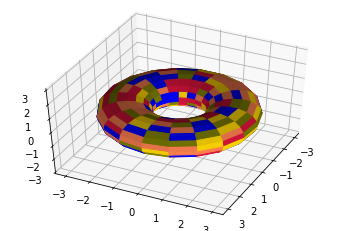

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(); ax = fig.gca(projection='3d')
angs = np.linspace(0, 2.*np.pi, 20)
theta, phi = np.meshgrid(angs, angs)
x = (2 + np.cos(theta)) * np.cos(phi)
y = (2 + np.cos(theta)) * np.sin(phi)
z = np.sin(theta)
rng = np.random.default_rng()
randind = rng.integers(5, size=x.shape)
colors = np.array(['crimson', 'coral', 'gold', 'blue', 'olive'])[randind]
ax.plot_surface(x, y, z, facecolors=colors, linewidth=1, edgecolors='k')
ax.view_init(46, 26); ax.set_zlim(-3,3);

Again, model the process as a Markov chain. This Markov chain arises in population genetics. It  shows you a manifestation of the *combinatorial explosion* (or the *curse of dimensionality*) that makes computation by the standard technique quickly infeasible.

- How many states are there for a given $n$ and $k$? 

- Is it feasible to extend the python function you wrote in Task 2 to compute the absorption probabilities for this Markov chain, say for $k=2, n=10$? 

- Imagine cutting, unfolding, and stretching the toroidal surface to a square with an $n \times n$ grid of color cells, respecting the *boundary identifications* inherited from the torus. Any state of the Markov chain can thus be implemented as a 2D integer numpy array  (each entry taking one of $k$ values, representing the colors). Write a python function to simulate the process for a general $n$ and $k$ using numpy's random module. You should see colors dispersing, coalescing, migrating etc, with the process eventually terminating in an absorbing state. 

- Create an animation displaying the sequence of states obtained in one call of your function, say with $k=4, n=10$, starting from some initial state of your choice.  (Be warned that there are random sequence of states that are too long to fit in memory even for small $n$ and $k$, so build in a fail-safe to avoid a computer crash.) Render the animation either on the toroidal grid or on the equivalent flat $n \times n$ grid.

Here is an example of the animation. 

In [8]:
from IPython.display import Video
Video("../figs/diversity2none.mp4", width=500)